In [1]:
# 1.2 Data Understanding e Data Preparation
# usada para carregar, organizar e manipular o conjunto de dados em um formato
#  estruturado, como DataFrame
import pandas as pd

# Carregando o dataset
penguins = pd.read_csv("penguins.csv")

# Exibindo as primeiras linhas do dataset
penguins.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
# Exibe o número de valores ausentes por coluna
print(penguins.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [ ]:
# para ajustar os dados a uma distribuição normal padrão, garantindo que todas as variáveis
#  tenham média zero e desvio padrão igual a 1. Isso evita que variáveis com escalas maiores 
# dominem o modelo.

# Classe uusada para normalizar ou padronizar os dados
from sklearn.preprocessing import StandardScaler

# Seleção e descrição das variáveis numéricas para o modelo de clustering
Xpenguins = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Tratamento de valores ausentes (substituição por média da coluna)
Xpenguins = Xpenguins.fillna(Xpenguins.mean())

# Normalização das variáveis numéricas
scaler = StandardScaler()
Xpenguins_scaled = scaler.fit_transform(Xpenguins)


In [4]:
# Exibe o número de valores ausentes por coluna
print(Xpenguins.isnull().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64


In [9]:
# 1.3 Modeling: Determinação do número ideal de clusters usando o método Elbow
# Importa o algoritmo de agrupamento K-Means da biblioteca scikit-learn
# erá utilizado para agrupar os dados em diferentes clusters, ou seja, 
# identificar padrões ou grupos no dataset.
from sklearn.cluster import KMeans

wcsse = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Xpenguins_scaled)
    wcsse.append(kmeans.inertia_)


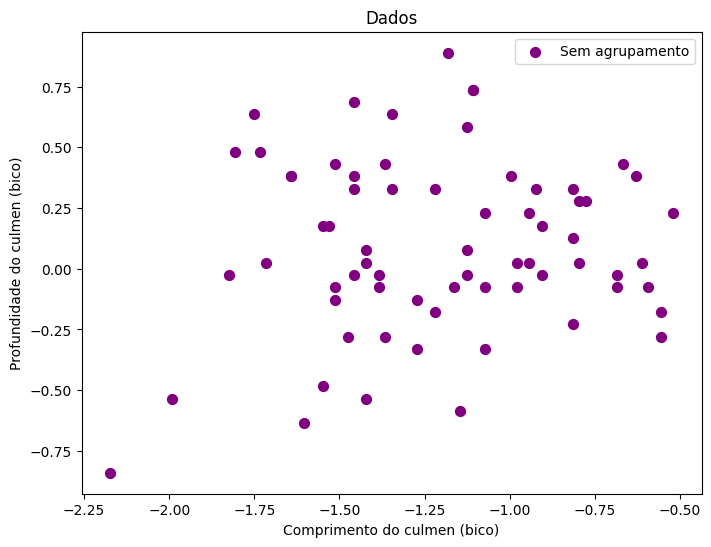

In [10]:
# 1.4 Evaluation: Visualização e avaliação dos clusters formados

# Biblioteca usada para criar gráficos e visualizações.
import matplotlib.pyplot as plt

# Dados sem agrupamento

# Definindo cores para cada cluster
colors = ['purple'] 
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plotando cada ponto com a cor do seu respectivo cluster
for i in range(1):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Sem agrupamento'
    )


plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Dados")
plt.legend()
plt.show()


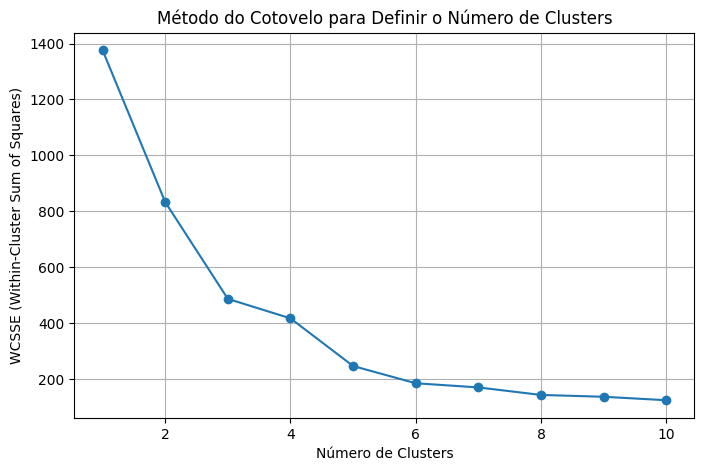

In [6]:
# Plotando o gráfico do método do cotovelo (Elbow Method)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcsse, marker='o')
plt.title('Método do Cotovelo para Definir o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSSE (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [18]:
# Definindo o número de clusters com base no Elbow
n_clusters = 3 

# Parâmetros alternativos
param_combinations = [
    {"init": "random", "n_clusters": n_clusters, "metric": "euclidean"}#,
    #{"init": "k-means++", "n_clusters": n_clusters, "metric": "euclidean"},
]


In [19]:
# Aplicação dos modelos com diferentes parâmetros e avaliação
results = []
for params in param_combinations:
    kmeans = KMeans(n_clusters=params["n_clusters"], init=params["init"], random_state=3)
    kmeans.fit(Xpenguins_scaled)
    
    # Guardar os resultados
    results.append({
        "inicialização": params["init"],
        "WCSSE": kmeans.inertia_,
        "Centroides": kmeans.cluster_centers_,
        "Labels": kmeans.labels_
    })

In [20]:
# Visualizar os dados armazenados
print(f"Modelo com inicialização {params['init']} e distância {params['metric']}:")
print("Centroides dos clusters:", kmeans.cluster_centers_)
print("WCSSE:", kmeans.inertia_)
print("-" * 50)

Modelo com inicialização random e distância euclidean:
Centroides dos clusters: [[ 0.88014656  0.76091601  0.19198729 -0.43831116]
 [ 0.65914815 -1.10319208  0.01222874  1.09494883]
 [-0.96943473  0.54299781 -0.10286725 -0.69208256]]
WCSSE: 654.5232338830422
--------------------------------------------------


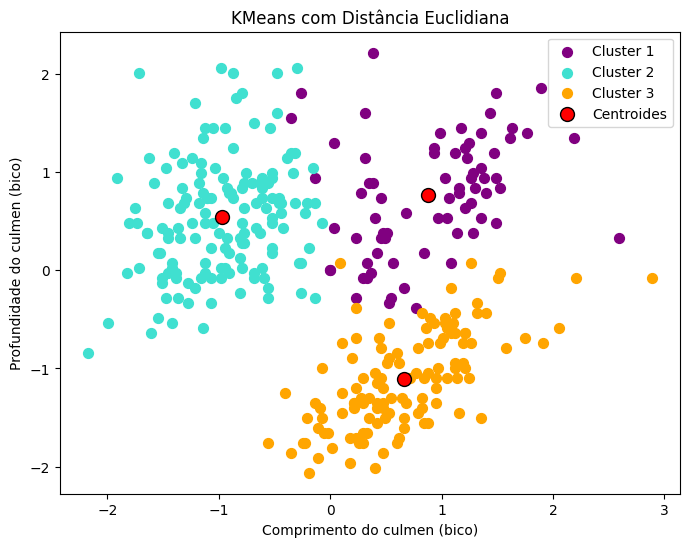

O novo pinguim pertence ao cluster: 0


C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
# 1.4 Evaluation: Visualização e avaliação dos clusters formados

# Medida de distância Euclididana 

# Definindo cores para cada cluster
colors = ['purple', 'turquoise', 'orange'] 
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plotando cada ponto com a cor do seu respectivo cluster
for i in range(n_clusters):  # Número de clusters = 3
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides em uma cor destacada
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

# Legenda
plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("KMeans com Distância Euclidiana")
plt.legend()
plt.show()

# Criação de dataset de teste com uma única linha para verificação do modelo
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])
cluster_predito = kmeans.predict(novo_pinguim)
print(f"O novo pinguim pertence ao cluster: {cluster_predito[0]}")


In [8]:
# Biblioteca SciPy para calcular distâncias entre dois conjuntos de pontos
from scipy.spatial.distance import cdist
# Fornece suporte para operações matemáticas e manipulação de arrays numéricos
import numpy as np

# Função para calcular o KMeans com distância de Manhattan
def kmeans_manhattan(X, n_clusters, max_iters=300, random_state=None):
    np.random.seed(random_state)
    
    # Inicializando os centroides aleatoriamente
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Calculando a matriz de distâncias de Manhattan
        distances = cdist(X, centroids, metric='cityblock')  # 'cityblock' é a distância de Manhattan
        
        # Atribuindo cada ponto ao cluster mais próximo
        labels = np.argmin(distances, axis=1)
        
        # Atualizando os centroides
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Verificando se houve mudança nos centroides
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Usando o kmeans_manhattan para calcular os clusters
centroids, labels = kmeans_manhattan(Xpenguins_scaled, n_clusters)

# Plotando os clusters com a distância de Manhattan
colors = ['purple', 'turquoise', 'orange'] 

plt.figure(figsize=(8, 6))

# Plotando os pontos com cores baseadas nos clusters
for i in range(n_clusters):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides (medoids)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("KMeans com Distância de Manhattan")
plt.legend()
plt.show()

# Predição para um novo pinguim (calculando a distância de Manhattan)
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])

# Calculando as distâncias de Manhattan ao centroides
distances = cdist(novo_pinguim, centroids, metric='cityblock')
cluster_predito = np.argmin(distances)

print(f"O novo pinguim pertence ao cluster: {cluster_predito}")


NameError: name 'plt' is not defined

In [12]:
# Contar o número de pontos em cada cluster
for i in range(n_clusters):
    count = np.sum(labels == i)
    print(f"Cluster {i}: {count} pontos")


Cluster 0: 123 pontos
Cluster 1: 171 pontos
Cluster 2: 50 pontos
